In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python matplotlib numpy

Upload your image...


Saving architectural-exterior-service.jpg to architectural-exterior-service.jpg
Image loaded successfully: architectural-exterior-service.jpg


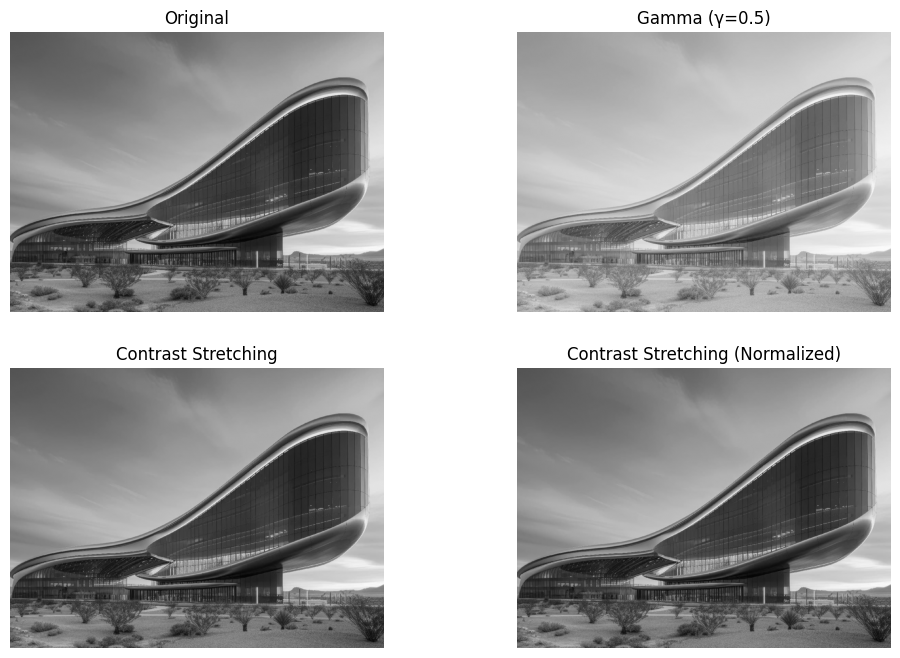

Processing Complete ✅
Saved files:
- gamma_output.png
- contrast_output.png
- contrast_normalized_output.png


In [11]:
# =========================================
# LAB 4 - Intensity Transformation (FULL)
# =========================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

# -------------------------------
# 1. UPLOAD IMAGE
# -------------------------------

print("Upload your image...")
uploaded = files.upload()

image_name = list(uploaded.keys())[0]
I_in = cv2.imread(image_name, 0)

if I_in is None:
    raise ValueError("Image not loaded. Check file format.")

print("Image loaded successfully:", image_name)

# -------------------------------
# 2. GAMMA CORRECTION
# -------------------------------

def gamma_correction(I_in, c, gamma):
    I_norm = I_in.astype('float32') / 255
    I_gamma = c * (I_norm ** gamma)
    return I_gamma

gamma_value = 0.5   # <-- change if needed

I_gamma = gamma_correction(I_in, 1, gamma_value)
I_gamma_out = (I_gamma * 255).clip(0,255).astype('uint8')
cv2.imwrite("gamma_output.png", I_gamma_out)

# -------------------------------
# 3. CONTRAST STRETCHING
# -------------------------------

def contrast_stretching(I_in, s_min, s_max):
    r_min = I_in.min()
    r_max = I_in.max()
    I_out = ((s_max - s_min) / (r_max - r_min)) * (I_in - r_min) + s_min
    return I_out

# Non-normalized
I_cs = contrast_stretching(I_in, 0, 255)
I_cs = I_cs.clip(0,255).astype('uint8')
cv2.imwrite("contrast_output.png", I_cs)

# Normalized
I_norm = I_in.astype('float32') / 255
I_cs_norm = contrast_stretching(I_norm, 0, 1)
I_cs_norm_out = (I_cs_norm * 255).clip(0,255).astype('uint8')
cv2.imwrite("contrast_normalized_output.png", I_cs_norm_out)

# -------------------------------
# 4. DISPLAY RESULTS
# -------------------------------

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(I_in, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title(f"Gamma (γ={gamma_value})")
plt.imshow(I_gamma_out, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title("Contrast Stretching")
plt.imshow(I_cs, cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title("Contrast Stretching (Normalized)")
plt.imshow(I_cs_norm_out, cmap='gray')
plt.axis('off')

plt.show()

print("Processing Complete ✅")
print("Saved files:")
print("- gamma_output.png")
print("- contrast_output.png")
print("- contrast_normalized_output.png")
